Accuracy with Min-Max Scaling: 0.9111
Accuracy with Standardization: 1.0000
Accuracy with Robust Scaling: 1.0000


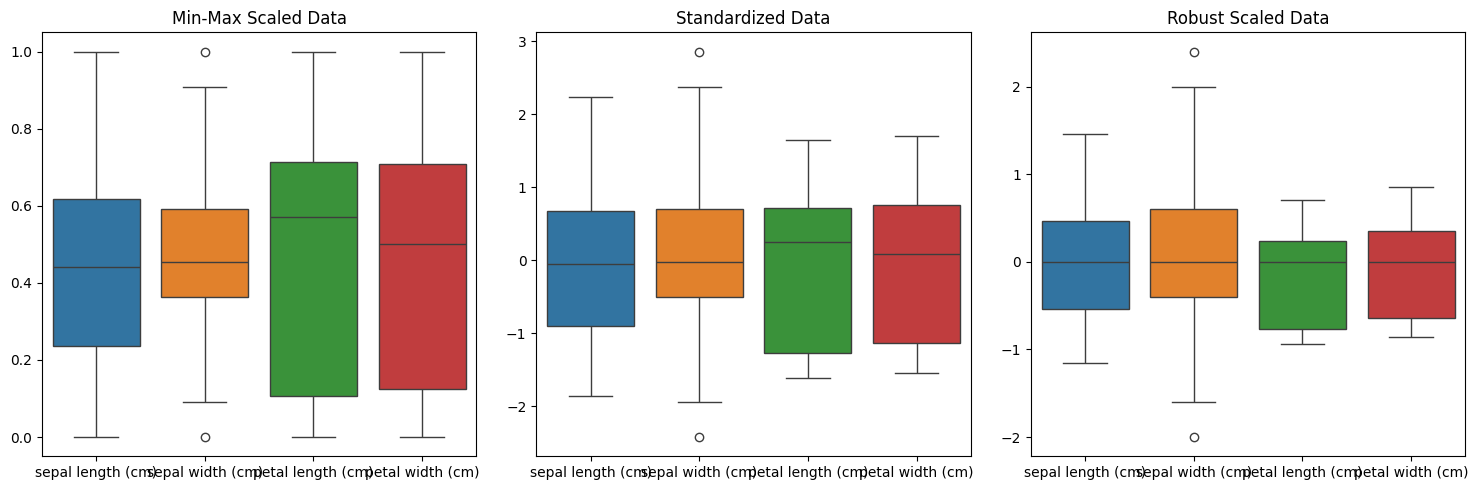

In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# --- 1. Min-Max Scaling ---
min_max_scaler = MinMaxScaler()
X_train_min_max = min_max_scaler.fit_transform(X_train)
X_test_min_max = min_max_scaler.transform(X_test)

# --- 2. Standardization (Z-score Scaling) ---
standard_scaler = StandardScaler()
X_train_standard = standard_scaler.fit_transform(X_train)
X_test_standard = standard_scaler.transform(X_test)

# --- 3. Robust Scaling ---
robust_scaler = RobustScaler()
X_train_robust = robust_scaler.fit_transform(X_train)
X_test_robust = robust_scaler.transform(X_test)

# --- Logistic Regression on different scalings ---
# Model function
def fit_model(X_train_scaled, X_test_scaled):
    model = LogisticRegression(max_iter=200)
    model.fit(X_train_scaled, y_train)
    return model.score(X_test_scaled, y_test)

# Evaluate the model for each scaling method
acc_min_max = fit_model(X_train_min_max, X_test_min_max)
acc_standard = fit_model(X_train_standard, X_test_standard)
acc_robust = fit_model(X_train_robust, X_test_robust)

# Print results
print(f"Accuracy with Min-Max Scaling: {acc_min_max:.4f}")
print(f"Accuracy with Standardization: {acc_standard:.4f}")
print(f"Accuracy with Robust Scaling: {acc_robust:.4f}")

# --- Visualization of Scaled Data ---
# Create a DataFrame for better visualization
df_min_max = pd.DataFrame(X_train_min_max, columns=iris.feature_names)
df_standard = pd.DataFrame(X_train_standard, columns=iris.feature_names)
df_robust = pd.DataFrame(X_train_robust, columns=iris.feature_names)

# Plotting the first feature comparison
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(data=df_min_max)
plt.title("Min-Max Scaled Data")

plt.subplot(1, 3, 2)
sns.boxplot(data=df_standard)
plt.title("Standardized Data")

plt.subplot(1, 3, 3)
sns.boxplot(data=df_robust)
plt.title("Robust Scaled Data")

plt.tight_layout()
plt.show()